In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import Area_Avg as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
#load in cloud feedbacks and dimensions as needed
Models = ['4xCO2','AMIP']

data_sw = dict()
data_lw = dict()

data_sw['4xCO2'] = pk.load(open(\
            'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
data_lw['4xCO2'] = pk.load(open(\
            'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))

data_sw['AMIP'] = pk.load(open(\
            'Data/CanESM5_p2/amip/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
data_lw['AMIP'] = pk.load(open(\
            'Data/CanESM5_p2/amip/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))
    
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [3]:
data_sw_plot = dict()
data_lw_plot = dict()
data_lw_gam = dict()
data_sw_gam = dict()
for mods in data_sw.keys():
    data_sw_plot[mods] = dict()
    data_lw_plot[mods] = dict()
    
    data_sw_gam[mods] = dict()
    data_lw_gam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_plot[mods][prop] = dict()
        data_lw_plot[mods][prop] = dict()
        
        data_sw_gam[mods][prop] = dict()
        data_lw_gam[mods][prop] = dict()
        
        for ctp in data_sw[mods][prop].keys():
            data_sw_gam[mods][prop][ctp] = np.average(data_sw[mods][prop][ctp],weights=coslat)
            data_lw_gam[mods][prop][ctp] = np.average(data_lw[mods][prop][ctp],weights=coslat)
            
            data_sw_plot[mods][prop][ctp] = np.concatenate((\
            data_sw[mods][prop][ctp][:,64:],data_sw[mods][prop][ctp][:,0:64]),axis=1)
            
            data_sw_plot[mods][prop][ctp],lon_cyc = add_cyclic_point(\
            data_sw_plot[mods][prop][ctp],lon)
            
            data_lw_plot[mods][prop][ctp] = np.concatenate((\
            data_lw[mods][prop][ctp][:,64:],data_lw[mods][prop][ctp][:,0:64]),axis=1)
            
            data_lw_plot[mods][prop][ctp],lon_cyc = add_cyclic_point(\
            data_lw_plot[mods][prop][ctp],lon)

Low Cloud Amount & High Cloud Optical Depth

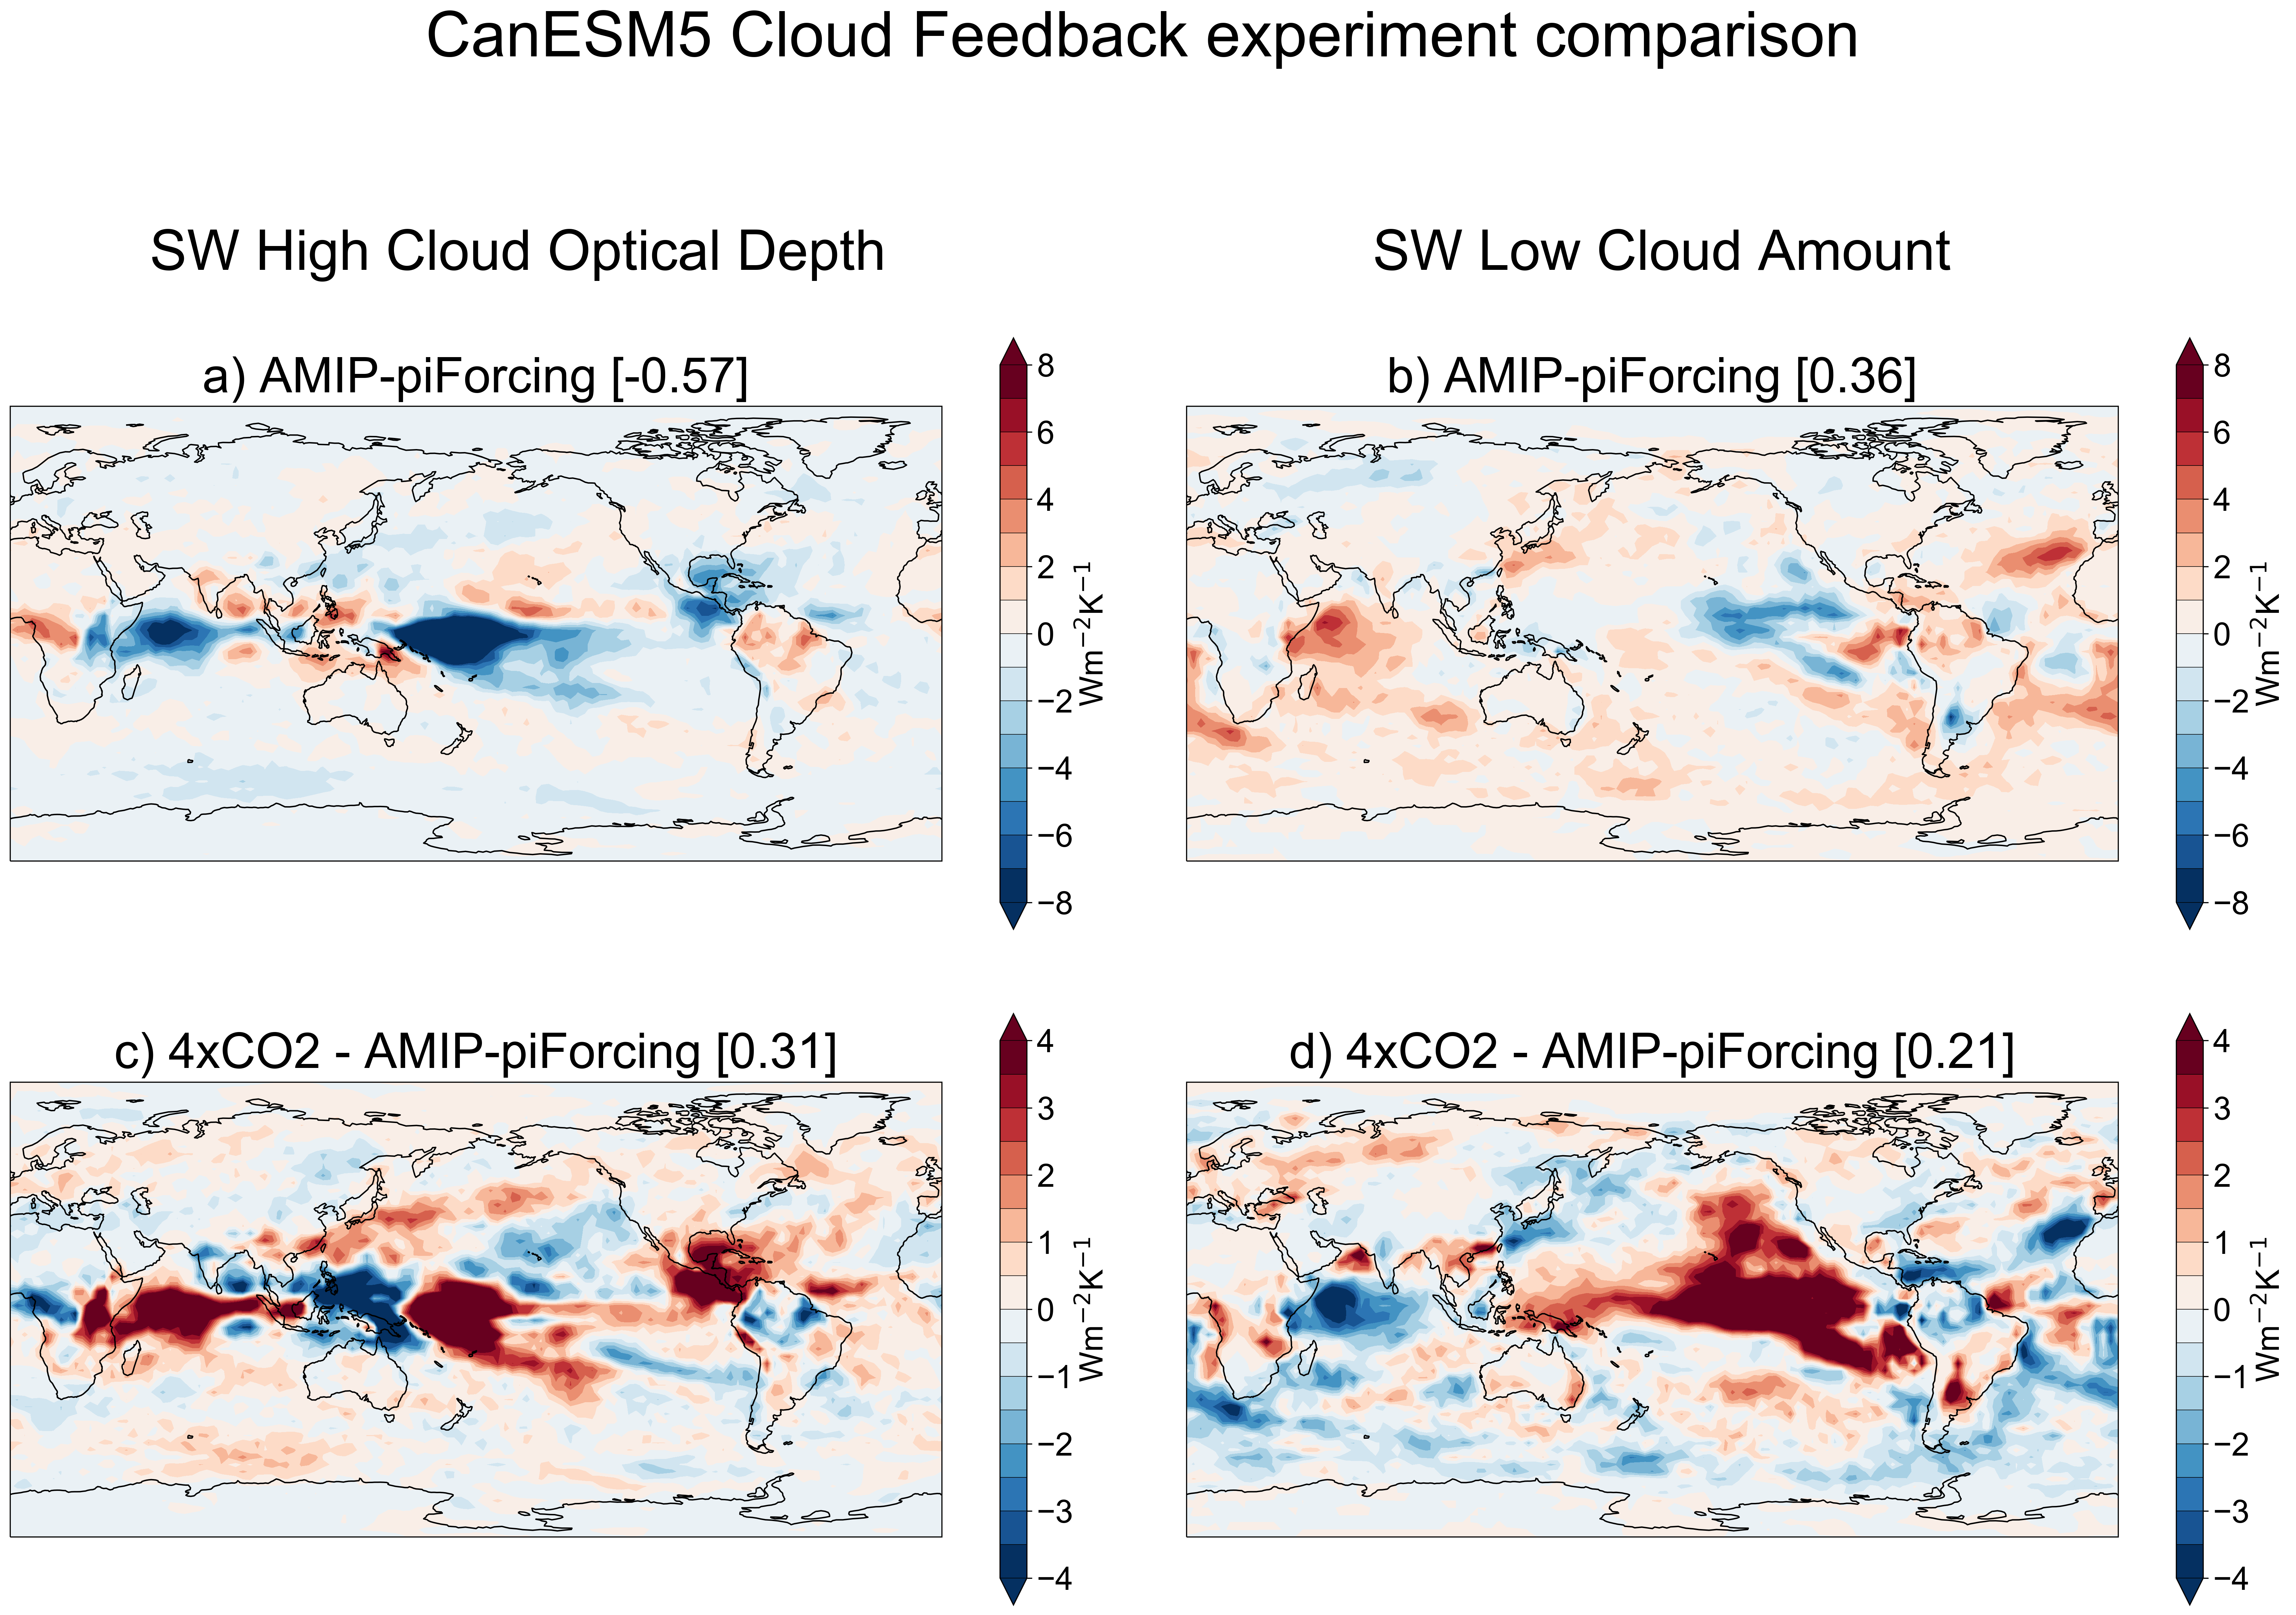

In [7]:
mpl.rc('font',size=23,**{'family':'sans-serif','sans-serif':['Arial']})
bounds = np.arange(-8,8.1,1)
bounds_ticks = np.arange(-8,8.1,2)
cmap = plt.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_diff = np.arange(-4,4.1,0.5)
bounds_diff_ticks = np.arange(-4,4.1,1)
norm_diff = mpl.colors.BoundaryNorm(bounds_diff, cmap.N)

fig = plt.figure(figsize=(30,20),dpi=300)
plt.suptitle('CanESM5 Cloud Feedback experiment comparison',fontsize=45)
#gs = gridspec.GridSpec(3,2, width_ratios=[0.6,1],height_ratios=[1,1,1]) 

#AMIP------------------
ax = plt.subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('a) AMIP-piForcing [{}]'.format(round(data_sw_gam['AMIP']['Optical Depth']['Hi'],2)),\
             fontsize=35,pad=10)
im = ax.contourf(lon_cyc,lat,data_sw_plot['AMIP']['Optical Depth']['Hi'],\
                   bounds,cmap=cmap,norm=norm,extend='both')
ax.coastlines()
plt.colorbar(im,ticks=bounds_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)
plt.text(0.15,1.3,'SW High Cloud Optical Depth',fontsize=40,transform = ax.transAxes)

ax1 = plt.subplot(222,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('b) AMIP-piForcing [{}]'.format(round(data_sw_gam['AMIP']['Amount']['Low'],2)),\
             fontsize=35,pad=10)
im1 = ax1.contourf(lon_cyc,lat,data_sw_plot['AMIP']['Amount']['Low'],\
                   bounds,cmap=cmap,norm=norm,extend='both')
ax1.coastlines()
plt.colorbar(im1,ticks=bounds_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)
plt.text(0.2,1.3,'SW Low Cloud Amount',fontsize=40,transform = ax1.transAxes)

#4xCO2 minus AMIP------------------
ax4 = plt.subplot(223,projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_title('c) 4xCO2 - AMIP-piForcing [{}]'.format(round(\
    data_sw_gam['4xCO2']['Optical Depth']['Hi']-\
    data_sw_gam['AMIP']['Optical Depth']['Hi'],2)),fontsize=35,pad=10)
im4 = ax4.contourf(lon_cyc,lat,data_sw_plot['4xCO2']['Optical Depth']['Hi']-\
                   data_sw_plot['AMIP']['Optical Depth']['Hi'],\
                   bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax4.coastlines()
plt.colorbar(im4,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

ax5 = plt.subplot(224,projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_title('d) 4xCO2 - AMIP-piForcing [{}]'.format(round(\
    data_sw_gam['4xCO2']['Amount']['Low']-data_sw_gam['AMIP']['Amount']['Low'],2)),\
             fontsize=35,pad=10)
im5 = ax5.contourf(lon_cyc,lat,data_sw_plot['4xCO2']['Amount']['Low']-\
                   data_sw_plot['AMIP']['Amount']['Low'],\
                   bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax5.coastlines()
plt.colorbar(im4,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

plt.subplots_adjust(wspace=0.01, hspace=-0.2)

plt.savefig('CLD_LowAmtHiOpt_FB_Map_amip.eps',bbox_inches='tight')